## Convolution Neural Network Implementation

In this Notebook we are going to see how to use tensorflow convolutions and pooling layer for building a highly efficient image classification model

In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from shutil import copyfile
import matplotlib.pyplot as plt

Download the dataset from its original source by running the cell below.

Note that the zip file that contains the images is unzipped under the /tmp directory.

In [2]:
# And right click on the 'Download Manually' link to get a new URL to the dataset

# Note: This is a very large dataset and will take some time to download

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2022-03-28 15:29:37--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 122.252.137.43, 2600:1417:2c:194::e59, 2600:1417:2c:1a4::e59, ...
Connecting to download.microsoft.com (download.microsoft.com)|122.252.137.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M  13.4MB/s    in 56s     

2022-03-28 15:30:33 (14.1 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [3]:
source_path = '/tmp/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12501 images of dogs.
There are 12501 images of cats.


You will need a directory for cats-v-dogs, and subdirectories for training and testing. These in turn will need subdirectories for 'cats' and 'dogs'. To accomplish this, complete the create_train_test_dirs below:

In [4]:
# Define root directory
root_dir = '/tmp/cats-v-dogs'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_test_dirs
def create_train_test_dirs(root_path):

  os.mkdir(f'{root_dir}')
  os.mkdir(f'{root_dir}/training')
  os.mkdir(f'{root_dir}/testing')
  os.mkdir(f'{root_dir}/training/cats')
  os.mkdir(f'{root_dir}/training/dogs')
  os.mkdir(f'{root_dir}/testing/cats')
  os.mkdir(f'{root_dir}/testing/dogs')

  pass
  
try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [5]:
# Test your create_train_test_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/testing
/tmp/cats-v-dogs/training/dogs
/tmp/cats-v-dogs/training/cats
/tmp/cats-v-dogs/testing/dogs
/tmp/cats-v-dogs/testing/cats


In [6]:
# GRADED FUNCTION: split_data
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  dataset = []
  
  for unitData in os.listdir(SOURCE):
    data = SOURCE + unitData
    if (os.path.getsize(data) > 0):
      dataset.append(unitData)
    else:
      print('Skipped ' + unitData)
      print('filename is zero length, so ignoring.')
  
  train_data_length = int(len(dataset) * SPLIT_SIZE)
  test_data_length = int(len(dataset) - train_data_length)
  shuffled_set = random.sample(dataset, len(dataset))
  train_set = shuffled_set[0:train_data_length]
  test_set = shuffled_set[-test_data_length:]
  
  for unitData in train_set:
    temp_train_data = SOURCE + unitData
    final_train_data = TRAINING + unitData
    copyfile(temp_train_data, final_train_data)
  
  for unitData in test_set:
    temp_test_data = SOURCE + unitData
    final_test_data = TESTING + unitData
    copyfile(temp_train_data, final_test_data)
  pass


In [7]:
# Test your split_data function

# Define paths
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
TESTING_DIR = "/tmp/cats-v-dogs/testing/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
TESTING_CATS_DIR = os.path.join(TESTING_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
TESTING_DOGS_DIR = os.path.join(TESTING_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_CATS_DIR)) > 0:
  for file in os.scandir(TESTING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_DOGS_DIR)) > 0:
  for file in os.scandir(TESTING_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(TESTING_CATS_DIR))} images of cats for testing")
print(f"There are {len(os.listdir(TESTING_DOGS_DIR))} images of dogs for testing")

Skipped 666.jpg
filename is zero length, so ignoring.
Skipped 11702.jpg
filename is zero length, so ignoring.


There are 11250 images of cats for training
There are 11250 images of dogs for training
There are 1250 images of cats for testing
There are 1250 images of dogs for testing


In [8]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale=1.0/255)

  # Pass in the appropiate arguments to the flow_from_directory method
  train_generator =train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=100, 
                                                    class_mode='binary', 
                                                    target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = train_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=100, 
                                                         class_mode='binary', 
                                                         target_size=(150, 150))
  return train_generator, validation_generator


In [9]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 22499 images belonging to 2 classes.
Found 2499 images belonging to 2 classes.


In [10]:
# GRADED FUNCTION: create_model
def create_model():
  # USE AT LEAST 3 CONVOLUTION LAYERS


  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                      tf.keras.layers.MaxPool2D(2,2),
                                      
                                      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      
                                      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation='relu'),
                                      tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])

  
  model.compile(optimizer=RMSprop(lr=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy']) 
    

  return model


In [11]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator)

/home/knoldus/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/10
150/225 [===================>..........] - ETA: 1:05 - loss: 0.7332 - accuracy: 0.6055

/home/knoldus/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
/home/knoldus/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
/home/knoldus/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
/home/knoldus/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
/home/knoldus/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
  warnings.warn(
/home/kno

225/225 [==============================] - 207s 912ms/step - loss: 0.6842 - accuracy: 0.6324 - val_loss: 0.4145 - val_accuracy: 1.0000
Epoch 2/10
225/225 [==============================] - 202s 897ms/step - loss: 0.5201 - accuracy: 0.7391 - val_loss: 0.4620 - val_accuracy: 0.5002
Epoch 3/10
225/225 [==============================] - 202s 895ms/step - loss: 0.4418 - accuracy: 0.7931 - val_loss: 0.1153 - val_accuracy: 1.0000
Epoch 4/10
225/225 [==============================] - 198s 877ms/step - loss: 0.3829 - accuracy: 0.8270 - val_loss: 0.0645 - val_accuracy: 1.0000
Epoch 5/10
225/225 [==============================] - 200s 889ms/step - loss: 0.3216 - accuracy: 0.8591 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 6/10
225/225 [==============================] - 204s 908ms/step - loss: 0.2514 - accuracy: 0.8925 - val_loss: 0.1258 - val_accuracy: 1.0000
Epoch 7/10
225/225 [==============================] - 352s 2s/step - loss: 0.1834 - accuracy: 0.9259 - val_loss: 0.0079 - val_accuracy:

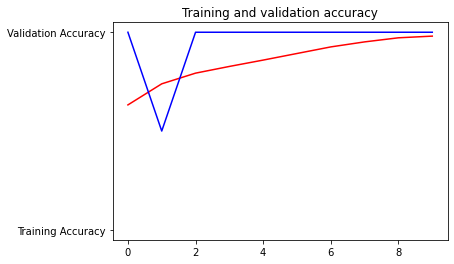

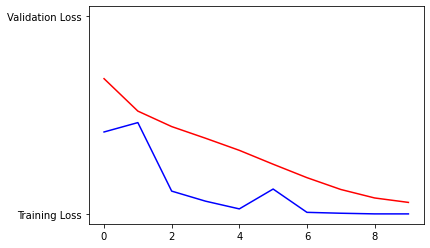

In [12]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()